In [14]:
Soda_api_key= 'b36mrla1dffyebzab8xfemphm'
Soda_api_secret= '2o8wj844uy5ng70ih0h63vke6ee9qyy2uhvr30rydcz4eeepoc'
crime_by_county_ny_api= 'https://data.ny.gov/resource/ca8h-8gjq.json'


In [328]:
import requests 
import json
import os 
import pandas as pd 
import numpy as np 
import datetime
import matplotlib.pyplot as plt 

# importing the first dataframe 

In [703]:
crime=r'C:\Users\Mamer Jammer\Desktop\Copy of Index_Crimes_by_County_and_Agency__Beginning_1990.csv'
crime_by_city=pd.read_csv(crime,header=0)


In [704]:
df=crime_by_city

In [705]:
df.head()


,Agency,Year,Months Reported,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
0,Albany City PD,2019,12.0,"3,661",735,4,61,189,481,"2,926",446,"2,321",159
1,Albany City PD,2018,12.0,"3,969",820,14,53,209,544,"3,149",433,"2,588",128
2,Albany City PD,2017,12.0,"4,282",876,8,53,246,569,"3,406",433,"2,864",109
3,Albany City PD,2016,12.0,"4,320",849,2,58,248,541,"3,471",491,"2,869",111
4,Albany City PD,2015,12.0,"4,276",823,5,49,240,529,"3,453",480,"2,852",121


In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Agency               270 non-null    object 
 1   Year                 270 non-null    int64  
 2   Months Reported      162 non-null    float64
 3   Index Total          270 non-null    object 
 4   Violent Total        270 non-null    object 
 5   Murder               270 non-null    int64  
 6   Rape                 270 non-null    int64  
 7   Robbery              270 non-null    object 
 8   Aggravated Assault   270 non-null    object 
 9   Property Total       270 non-null    object 
 10  Burglary             270 non-null    object 
 11  Larceny              270 non-null    object 
 12  Motor Vehicle Theft  270 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 27.5+ KB


# Cleaning The Data 

In [707]:
dft=df.transpose()
dft

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
Agency,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,...,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD
Year,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Months Reported,12,12,12,12,12,12,12,12,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Index Total,"3,661","3,969","4,282","4,320","4,276","4,661","4,881","5,126","5,542","5,616",...,"6,033","7,185","8,178","8,211","8,364","8,724","9,494","9,087","10,927","10,644"
Violent Total,735,820,876,849,823,775,796,799,936,978,...,915,"1,012","1,027","1,105","1,137","1,350","1,351","1,171","1,318","1,263"
Murder,4,14,8,2,5,8,8,5,4,3,...,4,10,16,14,9,14,19,14,9,18
Rape,61,53,53,58,49,27,32,41,30,41,...,33,31,33,34,25,41,34,38,48,43
Robbery,189,209,246,248,240,240,228,245,321,314,...,500,561,586,639,730,868,852,751,901,829
Aggravated Assault,481,544,569,541,529,500,528,508,581,620,...,378,410,392,418,373,427,446,368,360,373
Property Total,"2,926","3,149","3,406","3,471","3,453","3,886","4,085","4,327","4,606","4,638",...,"5,118","6,173","7,151","7,106","7,227","7,374","8,143","7,916","9,609","9,381"


In [708]:
dft=dft.reset_index()

# Dropping all the totals from the DataFrame 

In [709]:

dft=dft.drop(3)
dft=dft.drop(4)
dft=dft.drop(9)
dft

,index,0,1,2,3,4,5,6,7,8,...,260,261,262,263,264,265,266,267,268,269
0,Agency,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,Albany City PD,...,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD,Yonkers City PD
1,Year,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
2,Months Reported,12,12,12,12,12,12,12,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Murder,4,14,8,2,5,8,8,5,4,...,4,10,16,14,9,14,19,14,9,18
6,Rape,61,53,53,58,49,27,32,41,30,...,33,31,33,34,25,41,34,38,48,43
7,Robbery,189,209,246,248,240,240,228,245,321,...,500,561,586,639,730,868,852,751,901,829
8,Aggravated Assault,481,544,569,541,529,500,528,508,581,...,378,410,392,418,373,427,446,368,360,373
10,Burglary,446,433,433,491,480,680,702,888,890,...,939,"1,170","1,467","1,381","1,400","1,624","1,682","1,723","2,115","1,980"
11,Larceny,"2,321","2,588","2,864","2,869","2,852","3,084","3,243","3,288","3,547",...,"2,905","3,682","4,020","4,125","4,140","3,871","4,593","4,417","4,992","4,895"
12,Motor Vehicle Theft,159,128,109,111,121,122,140,151,169,...,"1,274","1,321","1,664","1,600","1,687","1,879","1,868","1,776","2,502","2,506"


In [710]:
dft=dft.drop(2)

In [711]:
dft=dft.transpose()

In [712]:
dft.head()

,0,1,5,6,7,8,10,11,12
index,Agency,Year,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny,Motor Vehicle Theft
0,Albany City PD,2019,4,61,189,481,446,"2,321",159
1,Albany City PD,2018,14,53,209,544,433,"2,588",128
2,Albany City PD,2017,8,53,246,569,433,"2,864",109
3,Albany City PD,2016,2,58,248,541,491,"2,869",111


In [713]:
dft.columns=dft.loc['index']

In [714]:
dft=dft.drop('index')

In [715]:
dft

index,Agency,Year,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny,Motor Vehicle Theft
0,Albany City PD,2019,4,61,189,481,446,"2,321",159
1,Albany City PD,2018,14,53,209,544,433,"2,588",128
2,Albany City PD,2017,8,53,246,569,433,"2,864",109
3,Albany City PD,2016,2,58,248,541,491,"2,869",111
4,Albany City PD,2015,5,49,240,529,480,"2,852",121
...,...,...,...,...,...,...,...,...,...
265,Yonkers City PD,1994,14,41,868,427,"1,624","3,871","1,879"
266,Yonkers City PD,1993,19,34,852,446,"1,682","4,593","1,868"
267,Yonkers City PD,1992,14,38,751,368,"1,723","4,417","1,776"
268,Yonkers City PD,1991,9,48,901,360,"2,115","4,992","2,502"


# Setting datetime from int dtype  

In [716]:
dft['day']=1
dft['Month']=12
dfx=dft[['Year','Month','day']]
dftime=pd.to_datetime(dfx,yearfirst=True,errors='coerce')


In [717]:
dftime.head()

0   2019-12-01
1   2018-12-01
2   2017-12-01
3   2016-12-01
4   2015-12-01
dtype: datetime64[ns]

In [718]:
dft['Date']=dftime
dft=dft.drop(["Year","Month",'day'],axis=1)
dft.head()

index,Agency,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny,Motor Vehicle Theft,Date
0,Albany City PD,4,61,189,481,446,"2,321",159,2019-12-01
1,Albany City PD,14,53,209,544,433,"2,588",128,2018-12-01
2,Albany City PD,8,53,246,569,433,"2,864",109,2017-12-01
3,Albany City PD,2,58,248,541,491,"2,869",111,2016-12-01
4,Albany City PD,5,49,240,529,480,"2,852",121,2015-12-01


# setting datetime as index 

In [719]:
dft=dft.set_index(['Date'])

# changing dtypes for columns

In [720]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2019-12-01 to 1990-12-01
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Agency               270 non-null    object
 1   Murder               270 non-null    object
 2   Rape                 270 non-null    object
 3   Robbery              270 non-null    object
 4   Aggravated Assault   270 non-null    object
 5   Burglary             270 non-null    object
 6   Larceny              270 non-null    object
 7   Motor Vehicle Theft  270 non-null    object
dtypes: object(8)
memory usage: 19.0+ KB


In [721]:
dft.Murder=dft.Murder.astype(int)

# stripping  commas and changing types 

In [722]:
dft['Robbery']=(dft['Robbery']).str.replace(",",'').astype(int)

In [723]:
dft['Aggravated Assault']=(dft['Aggravated Assault']).str.replace(",",'').astype(int)

In [724]:
dft['Burglary']=(dft['Burglary']).str.replace(",",'').astype(int)
dft['Larceny']=(dft['Larceny']).str.replace(",",'').astype(int)
dft['Motor Vehicle Theft']=(dft['Motor Vehicle Theft']).str.replace(",",'').astype(int)

In [725]:
dft.head()

index,Agency,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny,Motor Vehicle Theft
Date,,,,,,,,
2019-12-01,Albany City PD,4,61,189,481,446,2321,159
2018-12-01,Albany City PD,14,53,209,544,433,2588,128
2017-12-01,Albany City PD,8,53,246,569,433,2864,109
2016-12-01,Albany City PD,2,58,248,541,491,2869,111
2015-12-01,Albany City PD,5,49,240,529,480,2852,121


In [727]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2019-12-01 to 1990-12-01
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Agency               270 non-null    object
 1   Murder               270 non-null    int32 
 2   Rape                 270 non-null    object
 3   Robbery              270 non-null    int32 
 4   Aggravated Assault   270 non-null    int32 
 5   Burglary             270 non-null    int32 
 6   Larceny              270 non-null    int32 
 7   Motor Vehicle Theft  270 non-null    int32 
dtypes: int32(6), object(2)
memory usage: 12.7+ KB


In [728]:
dft.isna().sum()

index
Agency                 0
Murder                 0
Rape                   0
Robbery                0
Aggravated Assault     0
Burglary               0
Larceny                0
Motor Vehicle Theft    0
dtype: int64

In [868]:

crime_by=dft
crime_by_agency=pd.melt(crime_by,id_vars='Name',value_vars=['Murder','Rape','Aggravated Assault','Burglary','Larceny','Motor Vehicle Theft'],ignore_index=False)
crime_by_agency.head()


,Name,index,value
Date,,,
2019-12-01,Albany City PD,Murder,4
2018-12-01,Albany City PD,Murder,14
2017-12-01,Albany City PD,Murder,8
2016-12-01,Albany City PD,Murder,2
2015-12-01,Albany City PD,Murder,5


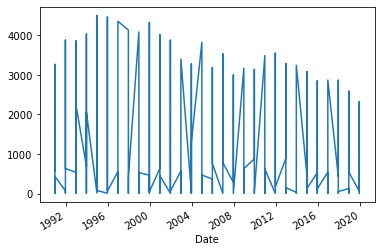

In [870]:
albany=crime_by_agency[crime_by_agency['Name']=='Albany City PD']
albany=pd.to_numeric(albany['value'])
testp=albany.plot(kind='line',x='index',y='Date')


# Importing unemployment dataframe 


In [745]:
unemployment=r'C:\Users\Mamer Jammer\Desktop\unemployment info 2019.csv'
unemployment2019=pd.read_csv(unemployment,header=0)

In [746]:
unemployment2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 7 columns):
 #   Column                                                                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                                                                   --------------  -----  
 0   Area                                                                                                                                                                                     3240 non-null   object 
 1   Year                                                                                                                                                                                     3240 non-null   int64  
 2   Month                            

In [747]:
df2=unemployment2019
df2.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate
0,Albany City,2019,12,"46,600","44,600","2,000",4.3
1,Albany City,2019,11,"47,000","45,000","2,000",4.3
2,Albany City,2019,10,"47,100","45,000","2,100",4.4
3,Albany City,2019,9,"46,700","44,600","2,100",4.5
4,Albany City,2019,8,"46,700","44,500","2,300",4.9


# creating datetime series and droping Year /Month 

In [748]:
df3=df2[['Year','Month']]
df3['day']=1
df3=pd.to_datetime(df3,yearfirst=True,errors='coerce')


<ipython-input-748-2432152f7769>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['day']=1


In [749]:
df3.head()

0   2019-12-01
1   2019-11-01
2   2019-10-01
3   2019-09-01
4   2019-08-01
dtype: datetime64[ns]

In [750]:
df2['Date']=df3

In [751]:
df2.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,Date
0,Albany City,2019,12,"46,600","44,600","2,000",4.3,2019-12-01
1,Albany City,2019,11,"47,000","45,000","2,000",4.3,2019-11-01
2,Albany City,2019,10,"47,100","45,000","2,100",4.4,2019-10-01
3,Albany City,2019,9,"46,700","44,600","2,100",4.5,2019-09-01
4,Albany City,2019,8,"46,700","44,500","2,300",4.9,2019-08-01


dropping columns year/month/day  

In [752]:
df2=df2.drop(["Year","Month"],axis=1)

# changing data types

In [753]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 6 columns):
 #   Column                                                                                                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                                                                                                   --------------  -----         
 0   Area                                                                                                                                                                                     3240 non-null   object        
 1   Labor Force                                                                                                                                                                              3240 non-null   object        
 2   Emplo

In [754]:
df2.head()

,Area,Labor Force,Employed,Unemployed,Unemployment Rate,Date
0,Albany City,"46,600","44,600","2,000",4.3,2019-12-01
1,Albany City,"47,000","45,000","2,000",4.3,2019-11-01
2,Albany City,"47,100","45,000","2,100",4.4,2019-10-01
3,Albany City,"46,700","44,600","2,100",4.5,2019-09-01
4,Albany City,"46,700","44,500","2,300",4.9,2019-08-01


In [755]:
df2['Labor Force']=(df2['Labor Force']).str.replace(",",'').astype(int)
df2['Employed']=(df2['Employed']).str.replace(",",'').astype(int)
df2['Unemployed']=(df2['Unemployed']).str.replace(",",'').astype(int)

In [664]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3240 entries, 2019-12-01 to 1990-01-01
Data columns (total 5 columns):
 #   Column                                                                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                                                                   --------------  -----  
 0   Area                                                                                                                                                                                     3240 non-null   object 
 1   Labor Force                                                                                                                                                                              3240 non-null   int32  
 2   Employed       

In [756]:
df2=df2.set_index('Date')
df2.head()

,Area,Labor Force,Employed,Unemployed,Unemployment Rate
Date,,,,,
2019-12-01,Albany City,46600,44600,2000,4.3
2019-11-01,Albany City,47000,45000,2000,4.3
2019-10-01,Albany City,47100,45000,2100,4.4
2019-09-01,Albany City,46700,44600,2100,4.5
2019-08-01,Albany City,46700,44500,2300,4.9


In [862]:
df3=pd.melt(df2,id_vars='Name',value_vars='Unemployment Rate',ignore_index=False)

In [865]:
df3=df3.rename(columns={'variable':'desc','value':'rate'})

<AxesSubplot:xlabel='Date'>

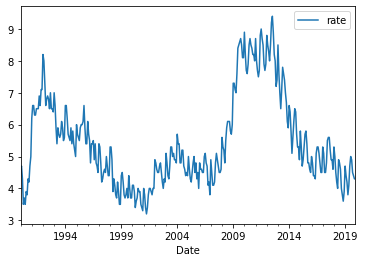

In [872]:
df3.head()
albany=df3[df3['Name']=='Albany City']
albany.plot()

In [689]:
df3['rate']=pd.to_numeric(df3['rate'])

In [690]:
df3.dtypes

Area     object
desc     object
rate    float64
dtype: object

In [843]:
dft=dft.rename(columns={'Agency':'Name'})
df2=df2.rename(columns={'Area':'Name'})

SyntaxError: invalid syntax (<ipython-input-855-bfb9f74ed2bf>, line 1)

In [850]:
merged=pd.merge(dft,df2,how='left',on=["Date",'Name'])

In [851]:
merged.head()

,Name,Murder,Rape,Robbery,Aggravated Assault,Burglary,Larceny,Motor Vehicle Theft,Labor Force,Employed,Unemployed,Unemployment Rate
Date,,,,,,,,,,,,
2019-12-01,Albany City PD,4,61,189,481,446,2321,159,NaN,NaN,NaN,NaN
2018-12-01,Albany City PD,14,53,209,544,433,2588,128,NaN,NaN,NaN,NaN
2017-12-01,Albany City PD,8,53,246,569,433,2864,109,NaN,NaN,NaN,NaN
2016-12-01,Albany City PD,2,58,248,541,491,2869,111,NaN,NaN,NaN,NaN
2015-12-01,Albany City PD,5,49,240,529,480,2852,121,NaN,NaN,NaN,NaN


# To do List : 
aggragate all the crime data, have a total line
install fuzzywuzzy and replace spring names and fix typos if there's any 
merge both data frames with only totals nothing more or less 
expeirmentally plot both and see how the work is being conducted 
